#https://towardsdatascience.com/financial-data-from-yahoo-finance-with-python-b5399743bcc6 
import sys
!{sys.executable} -m pip install yfinance


In [1]:
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn

/usr/lib/python3/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
# SP500 complete
start=datetime.datetime(1992, 1, 2)
end=datetime.datetime(2013, 1, 1)

#end=datetime.datetime(2013, 1, 1)
SP500 = yf.Ticker("^GSPC")
SP500 = SP500.history(start = start, end = end, period = "1d", prepost=False)


In [3]:
print(SP500.index)

DatetimeIndex(['1992-01-02', '1992-01-03', '1992-01-06', '1992-01-07',
               '1992-01-08', '1992-01-09', '1992-01-10', '1992-01-13',
               '1992-01-14', '1992-01-15',
               ...
               '2012-12-17', '2012-12-18', '2012-12-19', '2012-12-20',
               '2012-12-21', '2012-12-24', '2012-12-26', '2012-12-27',
               '2012-12-28', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=5291, freq=None)


In [4]:
print(len(SP500.index)*0.995)

5264.545


In [5]:
# Get Sector Data from Wikipedia
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df = first_table
#show unique economy sectors
sectors = df['GICS Sector'].values.tolist()
sectors = set(sectors)

In [6]:
print(sectors)

{'Utilities', 'Information Technology', 'Materials', 'Health Care', 'Industrials', 'Consumer Discretionary', 'Financials', 'Communication Services', 'Consumer Staples', 'Real Estate', 'Energy'}


In [7]:
NumberOfCompanies = 0

#### Fill almost complete Time Series

If a Time Series is not complete, but has more than 99.5% of the data: just interpolate the missing values by setting them equal to the previous value.

In [8]:
SPmissing =  yf.Ticker("^GSPC").history(start = start, end = end, period = "1d", prepost=False)


In [9]:
SPmissing = SPmissing.drop(SPmissing.index[99])
SPmissing =  SPmissing.drop(SPmissing.index[99])
SPmissing =  SPmissing.drop(SPmissing.index[1000])
SPmissing =  SPmissing.drop(SPmissing.index[5000])
print(SPmissing.index)

DatetimeIndex(['1992-01-02', '1992-01-03', '1992-01-06', '1992-01-07',
               '1992-01-08', '1992-01-09', '1992-01-10', '1992-01-13',
               '1992-01-14', '1992-01-15',
               ...
               '2012-12-17', '2012-12-18', '2012-12-19', '2012-12-20',
               '2012-12-21', '2012-12-24', '2012-12-26', '2012-12-27',
               '2012-12-28', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=5287, freq=None)


In [10]:
Missing = list(set(SP500.index) - set(SPmissing.index))
Missing = sorted(Missing)
print(Missing)

[Timestamp('1992-05-22 00:00:00'), Timestamp('1992-05-26 00:00:00'), Timestamp('1995-12-18 00:00:00'), Timestamp('2011-11-07 00:00:00')]


In [11]:
print(SPmissing)

                   Open         High          Low        Close      Volume  \
Date                                                                         
1992-01-02   417.029999   417.269989   411.040009   417.260010   207570000   
1992-01-03   417.269989   419.790009   416.160004   419.339996   224270000   
1992-01-06   419.309998   419.440002   416.920013   417.959991   251210000   
1992-01-07   417.959991   417.959991   415.200012   417.399994   252780000   
1992-01-08   417.359985   420.230011   415.019989   418.100006   290750000   
...                 ...          ...          ...          ...         ...   
2012-12-24  1430.150024  1430.150024  1424.660034  1426.660034  1248960000   
2012-12-26  1426.660034  1429.420044  1416.430054  1419.829956  2285030000   
2012-12-27  1419.829956  1422.800049  1401.800049  1418.099976  2830180000   
2012-12-28  1418.099976  1418.099976  1401.579956  1402.430054  2426680000   
2012-12-31  1402.430054  1426.739990  1398.109985  1426.189941  

In [12]:
for i in Missing:
    print(i)
    print(SP500.loc[i])
    SPmissing.loc[i] = np.nan 
SPmissing = SPmissing.sort_index()
print(SPmissing)

1992-05-22 00:00:00
Open            4.126100e+02
High            4.148200e+02
Low             4.126000e+02
Close           4.140200e+02
Volume          1.467100e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 1992-05-22 00:00:00, dtype: float64
1992-05-26 00:00:00
Open            4.140200e+02
High            4.140200e+02
Low             4.102300e+02
Close           4.114100e+02
Volume          1.977000e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 1992-05-26 00:00:00, dtype: float64
1995-12-18 00:00:00
Open            6.163400e+02
High            6.163400e+02
Low             6.061300e+02
Close           6.068100e+02
Volume          4.262700e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 1995-12-18 00:00:00, dtype: float64
2011-11-07 00:00:00
Open            1.253210e+03
High            1.261700e+03
Low             1.240750e+03
Close           1.261120e+03
Volume          3.429740e+09
Dividends       0.000000e+00
Stock Split

In [13]:
print(SPmissing.iloc[[99,100,1002,5003]])

            Open  High  Low  Close  Volume  Dividends  Stock Splits
Date                                                               
1992-05-22   NaN   NaN  NaN    NaN     NaN        NaN           NaN
1992-05-26   NaN   NaN  NaN    NaN     NaN        NaN           NaN
1995-12-18   NaN   NaN  NaN    NaN     NaN        NaN           NaN
2011-11-07   NaN   NaN  NaN    NaN     NaN        NaN           NaN


In [14]:
SPmissing["Close"].interpolate().iloc[[99,100,1002,5003]]

Date
1992-05-22     412.456675
1992-05-26     412.313344
1995-12-18     614.135010
2011-11-07    1264.575012
Name: Close, dtype: float64

In [15]:
print(SPmissing["Close"].iloc[95:105])

Date
1992-05-18    412.809998
1992-05-19    416.369995
1992-05-20    415.390015
1992-05-21    412.600006
1992-05-22           NaN
1992-05-26           NaN
1992-05-27    412.170013
1992-05-28    416.739990
1992-05-29    415.350006
1992-06-01    417.299988
Name: Close, dtype: float64


In [16]:
print(SPmissing["Close"].interpolate("nearest").iloc[95:105])

Date
1992-05-18    412.809998
1992-05-19    416.369995
1992-05-20    415.390015
1992-05-21    412.600006
1992-05-22    412.600006
1992-05-26    412.170013
1992-05-27    412.170013
1992-05-28    416.739990
1992-05-29    415.350006
1992-06-01    417.299988
Name: Close, dtype: float64


In [17]:
def Interpolate(DS, index):
    # takes pandas Series DS with some missing closing data and returns an interpolation for all
    # elements which are in index but not in DS.index
    Output = DS.copy()
    
    missing = set(index)-set(DS.index)
    
    for i in missing:
        Output.loc[i] = np.nan # add missing value
    Output = Output.sort_index() # sorting
    return(Output.interpolate("nearest"))

In [18]:
Interpolate(SPmissing["Close"], SP500.index)

Date
1992-01-02     417.260010
1992-01-03     419.339996
1992-01-06     417.959991
1992-01-07     417.399994
1992-01-08     418.100006
                 ...     
2012-12-24    1426.660034
2012-12-26    1419.829956
2012-12-27    1418.099976
2012-12-28    1402.430054
2012-12-31    1426.189941
Name: Close, Length: 5291, dtype: float64

In [19]:
CompaniesDF = pd.DataFrame({})
CompaniesDF.index = SP500.index
print(CompaniesDF)

Empty DataFrame
Columns: []
Index: [1992-01-02 00:00:00, 1992-01-03 00:00:00, 1992-01-06 00:00:00, 1992-01-07 00:00:00, 1992-01-08 00:00:00, 1992-01-09 00:00:00, 1992-01-10 00:00:00, 1992-01-13 00:00:00, 1992-01-14 00:00:00, 1992-01-15 00:00:00, 1992-01-16 00:00:00, 1992-01-17 00:00:00, 1992-01-20 00:00:00, 1992-01-21 00:00:00, 1992-01-22 00:00:00, 1992-01-23 00:00:00, 1992-01-24 00:00:00, 1992-01-27 00:00:00, 1992-01-28 00:00:00, 1992-01-29 00:00:00, 1992-01-30 00:00:00, 1992-01-31 00:00:00, 1992-02-03 00:00:00, 1992-02-04 00:00:00, 1992-02-05 00:00:00, 1992-02-06 00:00:00, 1992-02-07 00:00:00, 1992-02-10 00:00:00, 1992-02-11 00:00:00, 1992-02-12 00:00:00, 1992-02-13 00:00:00, 1992-02-14 00:00:00, 1992-02-18 00:00:00, 1992-02-19 00:00:00, 1992-02-20 00:00:00, 1992-02-21 00:00:00, 1992-02-24 00:00:00, 1992-02-25 00:00:00, 1992-02-26 00:00:00, 1992-02-27 00:00:00, 1992-02-28 00:00:00, 1992-03-02 00:00:00, 1992-03-03 00:00:00, 1992-03-04 00:00:00, 1992-03-05 00:00:00, 1992-03-06 00:00:00

In [20]:
def SectorNormReturns(sec,df, start, end, lag):
    global NumberOfCompanies
    # takes the name of a sector and returns the aggregated data of all companies' normalised returns from 
    # start to endhich have full data for this time period
    # Normalising via averages over lag
    #  df = pandas Dataframe of company symbols "Symbol" and sector "GICS Sector"
    
    Counter = 0 # how many "valid" time series?
    
    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series
    
    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector
    
    
    
    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end, period = "1d")
        StockData = StockData["Close"]
        print(sym,len(StockData.index), len(StockData.index) == len(SP500.index))
        
        
        # only add stocks to sector data which have full history
        if len(StockData.index) == len(SP500.index):
            
            Counter +=1
            
            
            # calculate returns via difference operator and an index shift
            StockShifted = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            StockShifted.index = StockData.index[1:(len(StockData))]
            StockData = (StockData.diff()/StockShifted) 
        
            # Shift the new data (again...) to calculate the average of the last "lag" returns before current date
            Shift = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            Shift.index = StockData.index[1:] 
            
            #print(sym)
            PlusOutput = (StockData-Shift.rolling(lag).mean())/Shift.rolling(lag).std()
            #print(PlusOutput)
            #print(sym, PlusOutput)

            Output = Output.add(PlusOutput)
            CompaniesDF[sym] = PlusOutput
            
        # if the data is incomplete, but almost complete    
        elif len(StockData.index) > 0.995*len(SP500.index): 
            
            # Interpolate the data
            StockData = Interpolate(StockData, SP500.index)
                        
            Counter +=1
            
            
            # calculate returns via difference operator and an index shift
            StockShifted = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            StockShifted.index = StockData.index[1:(len(StockData))]
            StockData = (StockData.diff()/StockShifted) 
        
            # Shift the new data (again...) to calculate the average of the last "lag" returns before current date
            Shift = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            Shift.index = StockData.index[1:] 
            
            #print(sym)
            PlusOutput = (StockData-Shift.rolling(lag).mean())/Shift.rolling(lag).std()
            #print(PlusOutput)
            #print(sym, PlusOutput)

            Output = Output.add(PlusOutput)
            CompaniesDF[sym] = PlusOutput
            
            
    NumberOfCompanies += Counter    
    print(Counter)   
    return(Output)

In [21]:
# Normalizes returns

NormRetDF = pd.DataFrame(data = ())


for s in sectors:
    print(s)
    SectorDF = df[df["GICS Sector"] == s]
    SectorSymbols = SectorDF['Symbol'].values.tolist()
    print(len(SectorDF["Symbol"]))
    
    #Seclist.append(SectorPrices(s, start, end))
    NormRetDF[s] = SectorNormReturns(s, df,start, end, 13)
    
    

Utilities
28
AES 5282 False
LNT 5282 False
AEE 3772 False
AEP 5281 False
AWK 1182 False
ATO 5291 True
CNP 5291 True
CMS 5284 False
ED 5279 False
D 5280 False
DTE 5285 False
DUK 5280 False
EIX 5282 False
ETR 5282 False
EVRG 5282 False
ES 5280 False
EXC 5280 False
FE 3809 False
NEE 5281 False
NI 5284 False
NRG 2286 False
PNW 5280 False
PPL 5282 False
PEG 5283 False
SRE 3651 False
SO 5285 False
WEC 5279 False
XEL 5281 False
23
Information Technology
74
ACN 2880 False
ADBE 5289 False
AMD 5290 False
AKAM 3313 False
APH 5280 False
ADI 5283 False
ANSS 4154 False
AAPL 5285 False
AMAT 5290 False
- ANET: Data doesn't exist for startDate = 694306800, endDate = 1356994800
ANET 0 False
ADSK 4583 False
ADP 5288 False
AVGO 857 False
BR 1456 False
CDNS 5280 False
- CDW: Data doesn't exist for startDate = 694306800, endDate = 1356994800
CDW 0 False
- CDAY: Data doesn't exist for startDate = 694306800, endDate = 1356994800
CDAY 0 False
CSCO 5290 False
CTXS 4288 False
CTSH 3657 False
GLW 5280 False
DXC 5

/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


VRTX 5274 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


VTRS 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


WAT 4297 False
WST 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


ZBH 2876 False
- ZTS: Data doesn't exist for startDate = 694306800, endDate = 1356994800
ZTS 0 False
34
Industrials
74
MMM 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


ALK 5283 False
- ALLE: Data doesn't exist for startDate = 694306800, endDate = 1356994800
ALLE 0 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


AAL 1828 False
AME 5275 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


AOS 5291 True


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


BA 5291 True
CHRW 3825 False
- CARR: Data doesn't exist for startDate = 694306800, endDate = 1356994800
CARR 0 False
CAT 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


CTAS 5283 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


CPRT 4722 False
CSX 5286 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


CMI 5279 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


DE 5281 False
DAL 1427 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


DOV 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


ETN 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


EMR 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


EFX 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


EXPD 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


FAST 5284 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


FDX 5279 False
- FTV: Data doesn't exist for startDate = 694306800, endDate = 1356994800
FTV 0 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


FBHS 324 False
GNRC 727 False
GD 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


GE 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


GWW 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


HON 5290 False
- HWM: No data found for this date range, symbol may be delisted
HWM 0 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


HII 448 False
IEX 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


INFO 1795 False
ITW 5280 False
- IR: Data doesn't exist for startDate = 694306800, endDate = 1356994800
IR 0 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


J 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


JBHT 5278 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


JCI 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


KSU 4566 False
LHX 5291 True
LDOS 1564 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


LMT 4519 False
MAS 5282 False
NLSN 486 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


NSC 5279 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


NOC 5284 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


ODFL 5201 False
- OTIS: Data doesn't exist for startDate = 694306800, endDate = 1356994800
OTIS 0 False
PCAR 5286 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


PH 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


PNR 5291 True


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


PWR 3745 False
RTX 5275 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


RSG 3649 False
RHI 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


ROK 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


ROL 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


ROP 5246 False
SNA 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


LUV 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


SWK 5279 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


TDY 3294 False
TXT 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


TT 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


TDG 1712 False
UNP 5276 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


UAL 1738 False
UPS 3305 False
URI 3781 False
VRSK 814 False
WAB 4402 False
WM 5278 False
XYL 305 False
44
Consumer Discretionary
63


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


AAP 2791 False
AMZN 3931 False
APTV 280 False
AZO 5283 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


BBWI 5284 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


BBY 5278 False
BKNG 3461 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


BWA 4882 False
- CZR: Data doesn't exist for startDate = 694306800, endDate = 1356994800
CZR 0 False
KMX 3995 False
CCL 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


CMG 1745 False
DHI 5168 False
DRI 4434 False
DG 787 False
DLTR 4488 False
DPZ 2134 False
EBAY 3590 False
- ETSY: Data doesn't exist for startDate = 694306800, endDate = 1356994800
ETSY 0 False
EXPE 1876 False
F 5279 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


GPS 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


GRMN 3032 False
GM 532 False
GPC 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


HBI 1591 False
HAS 5281 False
- HLT: Data doesn't exist for startDate = 694306800, endDate = 1356994800
HLT 0 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


HD 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


LVS 2025 False
LEG 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


LEN 4565 False
LKQ 2326 False
LOW 5283 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


MAR 3719 False
MCD 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


MGM 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


MHK 5217 False
NWL 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


NKE 5279 False
- NCLH: Data doesn't exist for startDate = 694306800, endDate = 1356994800
NCLH 0 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


NVR 4815 False
ORLY 4950 False
PENN 4669 False
POOL 4322 False
PHM 5279 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


PVH 5279 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


RL 3911 False
ROST 5285 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


RCL 4947 False
SBUX 5163 False
TPR 3077 False
TGT 5278 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


TSLA 632 False
TJX 5278 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


TSCO 4733 False
ULTA 1305 False
UAA 1790 False
- UA: Data doesn't exist for startDate = 694306800, endDate = 1356994800
UA 0 False
VFC 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


WHR 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


WYNN 2563 False
YUM 3845 False
22
Financials
65
AFL 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


ALL 4925 False
AXP 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


AIG 5283 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


AMP 1836 False
AON 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


AJG 5277 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


AIZ 2242 False
BAC 5276 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


- BRK.B: No data found, symbol may be delisted
BRK.B 0 False
BLK 3333 False
BK 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


BRO 5275 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


COF 4554 False
CBOE 642 False
SCHW 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


CB 4970 False
CINF 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


C 5275 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


- CFG: Data doesn't exist for startDate = 694306800, endDate = 1356994800
CFG 0 False
CME 2534 False
CMA 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


DFS 1398 False
RE 4334 False
FITB 5279 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


FRC 518 False
BEN 5279 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


GL 5279 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


GS 3438 False
HIG 4279 False
HBAN 5283 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


ICE 1792 False
IVZ 4428 False
JPM 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


KEY 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


LNC 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


L 5279 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


MTB 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


MKTX 2052 False
MMC 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


MET 3204 False
MCO 4563 False
MS 5283 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


MSCI 1290 False
NDAQ 2645 False
NTRS 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


PBCT 5279 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


PNC 5283 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


PFG 2817 False
PGR 5279 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


PRU 2781 False
RJF 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


RF 3742 False
SPGI 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


STT 5278 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


SIVB 5276 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


- SYF: Data doesn't exist for startDate = 694306800, endDate = 1356994800
SYF 0 False
TROW 5278 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


TRV 5277 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


TFC 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


USB 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


WRB 5278 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


WFC 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


WLTW 2906 False
ZION 5275 False
38
Communication Services
27


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


ATVI 4816 False
GOOGL 2107 False
- GOOG: Data doesn't exist for startDate = 694306800, endDate = 1356994800
GOOG 0 False
T 5279 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


CHTR 753 False
CMCSA 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


DISCA 1886 False
DISCK 1079 False
DISH 4403 False
EA 5289 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


- FOXA: Data doesn't exist for startDate = 694306800, endDate = 1356994800
FOXA 0 False
- FOX: Data doesn't exist for startDate = 694306800, endDate = 1356994800
FOX 0 False
IPG 5277 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


LYV 1773 False
LUMN 5279 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


MTCH 5013 False
FB 155 False
NFLX 2671 False
- NWSA: Data doesn't exist for startDate = 694306800, endDate = 1356994800
NWSA 0 False
- NWS: Data doesn't exist for startDate = 694306800, endDate = 1356994800
NWS 0 False
OMC 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


TMUS 1437 False
TTWO 3939 False
- TWTR: Data doesn't exist for startDate = 694306800, endDate = 1356994800
TWTR 0 False
VZ 5279 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


VIAC 1780 False
DIS 5280 False
8
Consumer Staples
32


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


MO 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


ADM 5283 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


- BF.B: None
BF.B 0 False
CPB 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


CHD 5279 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


CLX 5291 True


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


KO 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


CL 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


CAG 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


STZ 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


COST 5284 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


EL 4299 False
GIS 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


HSY 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


HRL 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


SJM 4565 False
K 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


KMB 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


- KHC: Data doesn't exist for startDate = 694306800, endDate = 1356994800
KHC 0 False
KR 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


- LW: Data doesn't exist for startDate = 694306800, endDate = 1356994800
LW 0 False
MKC 5279 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


TAP 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


MDLZ 2906 False
MNST 5212 False
PEP 5277 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


PM 1208 False
PG 5283 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


SYY 5276 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


TSN 5277 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


WMT 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


WBA 5284 False
24
Real Estate
29


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


ARE 3922 False
AMT 3735 False
AVB 4727 False
BXP 3908 False
CBRE 2155 False
CCI 3616 False
DLR 2057 False
DRE 4847 False
EQIX 3115 False
EQR 4874 False
ESS 4667 False
EXR 2110 False
FRT 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


PEAK 5283 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


HST 4841 False
IRM 4244 False
KIM 5284 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


MAA 4751 False
PLD 3799 False
PSA 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


O 4576 False
REG 4819 False
SBAC 3408 False
SPG 4787 False
UDR 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


VTR 3934 False
VNO 5276 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


WELL 5282 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


WY 5279 False
8
Energy
21


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


APA 5291 True


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


BKR 5291 True
CVX 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


COP 5291 True


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


CTRA 5278 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


DVN 5279 False
FANG 53 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


EOG 5280 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


XOM 5276 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


HAL 5281 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


HES 5292 False
KMI 475 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


MRO 5291 True
MPC 383 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


OXY 5284 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


OKE 5281 False
PSX 181 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


PXD 3872 False
SLB 5276 False


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


VLO 3876 False
WMB 5280 False
15


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [22]:
print(NumberOfCompanies)

263


In [23]:
StockData = yf.Ticker("WMB")
StockData = StockData.history(start = start, end = end, period = "1d")
set(SP500.index) - set(StockData.index)

{Timestamp('1996-03-04 00:00:00'),
 Timestamp('1996-07-23 00:00:00'),
 Timestamp('1997-04-04 00:00:00'),
 Timestamp('1997-04-10 00:00:00'),
 Timestamp('1997-04-18 00:00:00'),
 Timestamp('1997-06-09 00:00:00'),
 Timestamp('1997-07-22 00:00:00'),
 Timestamp('1997-07-28 00:00:00'),
 Timestamp('1997-09-09 00:00:00'),
 Timestamp('1997-11-25 00:00:00'),
 Timestamp('1998-01-14 00:00:00'),
 Timestamp('1998-11-25 00:00:00')}

In [24]:
StockData = yf.Ticker("CSCO")
StockData = StockData.history(start = start, end = end, period = "1d")
set(SP500.index) - set(StockData.index)

{Timestamp('1997-09-09 00:00:00')}

            Consumer Staples  Utilities  Information Technology  Industrials  \
Date                                                                           
1992-01-02               NaN        0.0                     NaN          NaN   
1992-01-03               NaN        0.0                     NaN          NaN   
1992-01-06               NaN        0.0                     NaN          NaN   
1992-01-07               NaN        0.0                     NaN          NaN   
1992-01-08               NaN        0.0                     NaN          NaN   
...                      ...        ...                     ...          ...   
2012-12-24         -0.500672        0.0               -1.972311    -4.995078   
2012-12-26         -0.687495        0.0               -5.471375    -2.509213   
2012-12-27          0.346695        0.0               -4.042904    -2.551367   
2012-12-28         -0.371900        0.0               -6.756870   -11.272262   
2012-12-31          1.555407        0.0               10.037852    13.397237   

            Financials  Communication Services  Health Care  \
Date                                                          
1992-01-02         NaN                     NaN          NaN   
1992-01-03         NaN                     NaN          NaN   
1992-01-06         NaN                     NaN          NaN   
1992-01-07         NaN                     NaN          NaN   
1992-01-08         NaN                     NaN          NaN   
...                ...                     ...          ...   
2012-12-24   -0.796597               -0.753516    -0.327770   
2012-12-26   -1.053922               -2.231853    -4.193964   
2012-12-27   -0.430637                0.483345     3.014318   
2012-12-28   -0.824790               -0.561735    -2.427771   
2012-12-31    0.575290                1.886439     3.294325   

            Consumer Discretionary    Energy  Materials  Real Estate  
Date                                                                  
1992-01-02                     NaN       NaN        0.0          0.0  
1992-01-03                     NaN       NaN        0.0          0.0  
1992-01-06                     NaN       NaN        0.0          0.0  
1992-01-07                     NaN       NaN        0.0          0.0  
1992-01-08                     NaN       NaN        0.0          0.0  
...                            ...       ...        ...          ...  
2012-12-24               -0.383354 -1.156692        0.0          0.0  
2012-12-26               -3.739988 -0.631933        0.0          0.0  
2012-12-27                1.238623 -0.355332        0.0          0.0  
2012-12-28               -2.848384 -1.267027        0.0          0.0  
2012-12-31                9.415495  2.488306        0.0          0.0 

In [25]:
print(NormRetDF)

            Utilities  Information Technology  Materials  Health Care  \
Date                                                                    
1992-01-02        NaN                     NaN        NaN          NaN   
1992-01-03        NaN                     NaN        NaN          NaN   
1992-01-06        NaN                     NaN        NaN          NaN   
1992-01-07        NaN                     NaN        NaN          NaN   
1992-01-08        NaN                     NaN        NaN          NaN   
...               ...                     ...        ...          ...   
2012-12-24 -13.150235              -15.559262   3.114686   -10.961609   
2012-12-26 -30.880331              -26.606141  -3.296699   -34.500741   
2012-12-27  -4.516366               -7.459821  -9.782953    -0.294040   
2012-12-28 -24.800785              -33.630637 -20.600914   -36.070073   
2012-12-31  41.969551               49.739138  17.719807    46.563195   

            Industrials  Consumer Discretionary  F

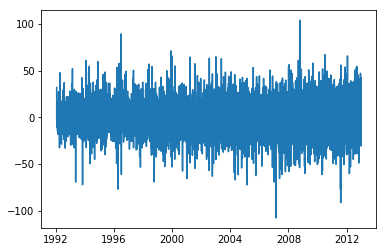

In [26]:
plt.plot(NormRetDF["Utilities"])

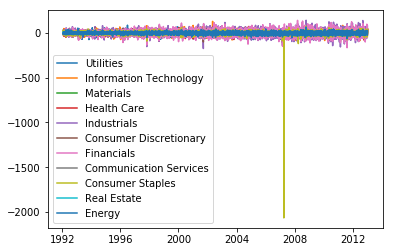

In [27]:
for i in NormRetDF.columns:
    plt.plot(NormRetDF[i], label=i)
    
plt.legend()
plt.show()

Something stragne happened in the IT data:

In [28]:
NormRetDF.idxmin()

Utilities                2007-02-27
Information Technology   2007-02-27
Materials                1997-10-27
Health Care              1997-10-27
Industrials              2001-09-17
Consumer Discretionary   1997-10-27
Financials               2011-08-08
Communication Services   1997-10-27
Consumer Staples         2007-04-02
Real Estate              2011-08-08
Energy                   2011-08-04
dtype: datetime64[ns]

In [29]:
NormRetDF.loc["2000-11-29"]

Utilities                 15.161161
Information Technology    -2.135243
Materials                  3.966142
Health Care               22.057105
Industrials               25.071082
Consumer Discretionary    -0.512288
Financials                50.500622
Communication Services     0.478041
Consumer Staples          11.374062
Real Estate                3.524026
Energy                   -42.144861
Name: 2000-11-29 00:00:00, dtype: float64

In [30]:
IT = set(df[df["GICS Sector"] =="Information Technology"]["Symbol"])
print(IT)

{'NTAP', 'MSFT', 'MSI', 'TER', 'CDW', 'KEYS', 'NVDA', 'DXC', 'FLT', 'FISV', 'ENPH', 'IT', 'IPGP', 'PTC', 'TXN', 'WDC', 'ADI', 'ACN', 'MU', 'MPWR', 'TRMB', 'CTSH', 'INTU', 'CSCO', 'PYPL', 'SWKS', 'PAYX', 'TEL', 'ADSK', 'JNPR', 'IBM', 'BR', 'APH', 'CDAY', 'INTC', 'QRVO', 'ADP', 'ADBE', 'SNPS', 'HPE', 'LRCX', 'ZBRA', 'AKAM', 'KLAC', 'GLW', 'CRM', 'FFIV', 'GPN', 'NXPI', 'NLOK', 'MCHP', 'ORCL', 'ANET', 'WU', 'XLNX', 'AMAT', 'CTXS', 'NOW', 'V', 'AVGO', 'HPQ', 'CDNS', 'ANSS', 'FIS', 'FTNT', 'JKHY', 'PAYC', 'QCOM', 'MA', 'STX', 'TYL', 'AMD', 'VRSN', 'AAPL'}


## Some Data Analysis

In [31]:
Corr = NormRetDF.corr()

for i in Corr.columns:
    print(np.mean(Corr[i]),i)

Corr

0.5282801107104377 Utilities
0.6155367437395848 Information Technology
0.6546977376420522 Materials
0.6544320501287944 Health Care
0.7051472379677968 Industrials
0.656557597009138 Consumer Discretionary
0.670530877196055 Financials
0.6244008431653767 Communication Services
0.35235051491483627 Consumer Staples
0.5429389836633425 Real Estate
0.501180519086912 Energy


,Utilities,Information Technology,Materials,Health Care,Industrials,Consumer Discretionary,Financials,Communication Services,Consumer Staples,Real Estate,Energy
Utilities,1.000000,0.424780,0.525519,0.534249,0.548931,0.487982,0.562034,0.514662,0.277152,0.458927,0.476846
Information Technology,0.424780,1.000000,0.636956,0.694774,0.762903,0.690690,0.677191,0.678397,0.261962,0.491217,0.452034
Materials,0.525519,0.636956,1.000000,0.680501,0.835783,0.727191,0.712357,0.632114,0.302532,0.573071,0.575650
Health Care,0.534249,0.694774,0.680501,1.000000,0.771111,0.712116,0.737239,0.681687,0.336462,0.546395,0.504219
Industrials,0.548931,0.762903,0.835783,0.771111,1.000000,0.820191,0.801372,0.723783,0.324375,0.610159,0.558011
Consumer Discretionary,0.487982,0.690690,0.727191,0.712116,0.820191,1.000000,0.757887,0.681995,0.321516,0.579735,0.442832
Financials,0.562034,0.677191,0.712357,0.737239,0.801372,0.757887,1.000000,0.705169,0.332385,0.615201,0.475005
Communication Services,0.514662,0.678397,0.632114,0.681687,0.723783,0.681995,0.705169,1.000000,0.296110,0.500146,0.454347
Consumer Staples,0.277152,0.261962,0.302532,0.336462,0.324375,0.321516,0.332385,0.296110,1.000000,0.223399,0.199961
Real Estate,0.458927,0.491217,0.573071,0.546395,0.610159,0.579735,0.615201,0.500146,0.223399,1.000000,0.374080


In [32]:
pca = PCA()
pca.fit(Corr)

PCA()

In [33]:
print(pca.explained_variance_ratio_)

[5.45842557e-01 1.54757540e-01 9.65671818e-02 7.15319973e-02
 4.72273803e-02 2.58192723e-02 2.36810473e-02 1.59837617e-02
 1.38002834e-02 4.78897840e-03 6.69092788e-33]


In [34]:
pca.components_

array([[-0.07642309, -0.35599541, -0.32406575, -0.3120893 , -0.37863782,
        -0.36020283, -0.33571814, -0.31170667,  0.3530206 , -0.21721779,
        -0.10109862],
       [ 0.38696405, -0.1934552 ,  0.04653522, -0.11424668, -0.08768176,
        -0.22677604, -0.13713857, -0.136925  , -0.54359879,  0.03356064,
         0.635861  ],
       [ 0.2715846 , -0.24269856, -0.10491807, -0.10934435, -0.10098127,
        -0.0014284 ,  0.09225389, -0.12061592, -0.17738677,  0.75189663,
        -0.46292805],
       [ 0.77769433, -0.04682053, -0.13769601,  0.13568682, -0.03688979,
        -0.01377608,  0.12828297,  0.27777018,  0.09110552, -0.41981095,
        -0.27554197],
       [-0.16793184,  0.46991347, -0.54364779, -0.01175823, -0.24757082,
        -0.23009156, -0.16578627,  0.4142597 , -0.36246495,  0.04560382,
        -0.09218943],
       [-0.18497529, -0.52487061,  0.09411271, -0.32905891, -0.04293834,
         0.04231381,  0.11765219,  0.73493776,  0.03981959,  0.03860114,
         0.111

## Interval-wise

In [35]:
Period = 40 # 2 trading months

T = int(len(NormRetDF)/Period)


for t in range(T):
    IntervalDF = NormRetDF.iloc[(0+t*Period):(Period+t*Period)]
    IntervalCorr = IntervalDF.corr()
    pca = PCA()
    pca.fit(IntervalCorr)
    print(pca.explained_variance_ratio_[0], t)

0.32411371916874165 0
0.6089631438430719 1
0.6290094788949169 2
0.6313243201915377 3
0.45834903117997133 4
0.562275234773346 5
0.4754613777465036 6
0.5772389878168823 7
0.42343834256342083 8
0.41788979376405294 9
0.3654798771434805 10
0.3379320358614164 11
0.5154663310898755 12
0.3841649432630099 13
0.46360935287830934 14
0.5108956793340385 15
0.32870244885222255 16
0.31067126425547464 17
0.5994091035071664 18
0.3948614295925463 19
0.4208401534047739 20
0.36785048590398617 21
0.3486854875935595 22
0.4137337007677035 23
0.29756968861524064 24
0.4086479208042086 25
0.678938197421521 26
0.47298860899021716 27
0.4639641272750969 28
0.5177685881230722 29
0.40539095919573387 30
0.44299856158971795 31
0.5151486290409174 32
0.5337756777706368 33
0.7169648950751016 34
0.6221591102034412 35
0.6102705587588739 36
0.538246889164772 37
0.48970161244199206 38
0.5880051123400717 39
0.6172473466581957 40
0.422643669547572 41
0.8832402565916619 42
0.35650599360182894 43
0.4816029595962345 44
0.41680248

In [36]:
# now overlapping intervals
Period = 40 # 2 trading months
Shift = 10
T = int((len(NormRetDF) - Period)/Shift)

CorrMatrices = np.empty((T, 121))


for t in range(T):
    #print((0+t*Shift),(Period+t*Shift))
    IntervalDF = NormRetDF.iloc[(0+t*Shift):(Period+t*Shift)]
    IntervalCorr = IntervalDF.corr()
    CorrMatrices[t,:] = IntervalCorr.to_numpy().reshape(1,-1)
    
    pca = PCA()
    pca.fit(IntervalCorr)
    print(pca.explained_variance_ratio_[0], t)

0.32411371916874165 0
0.38218707269295377 1
0.4195744463786481 2
0.5819414589257661 3
0.6089631438430719 4
0.7100231534604102 5
0.7005085905340306 6
0.6488720124082827 7
0.6290094788949169 8
0.650334038422894 9
0.6419190582905797 10
0.7013152534013669 11
0.6313243201915377 12
0.4726976276557616 13
0.55743562614853 14
0.48576294834325695 15
0.45834903117997133 16
0.5270480709749674 17
0.5596478190325295 18
0.557662110386036 19
0.562275234773346 20
0.460754816360477 21
0.4004646787839671 22
0.4015612918072087 23
0.4754613777465036 24
0.4673303727081798 25
0.4750748736648096 26
0.5243731831560214 27
0.5772389878168823 28
0.5397424029804049 29
0.4589801167323746 30
0.47431617848351804 31
0.42343834256342083 32
0.4979224691874256 33
0.513901520020294 34
0.43466997765584575 35
0.41788979376405294 36
0.3385539266316613 37
0.3201312449904968 38
0.31547732771109627 39
0.3654798771434805 40
0.4354701332611456 41
0.3640697304323174 42
0.37344478458591246 43
0.3379320358614164 44
0.303631711240209

0.6690027782873582 366
0.6527306528793382 367
0.6845862206922082 368
0.6032953659764129 369
0.578348908843332 370
0.5788546807540242 371
0.614661778325164 372
0.6690688746887614 373
0.5921793725436674 374
0.64119290888653 375
0.47637004534068295 376
0.4170305973782017 377
0.5598151781022287 378
0.5047254340546546 379
0.5899670981201275 380
0.8705236738298695 381
0.7802446437288316 382
0.7135177931909431 383
0.6577287866906478 384
0.4484595767142929 385
0.5407772041154683 386
0.5161809541545328 387
0.5519540756796342 388
0.47047047829000155 389
0.43055845693979156 390
0.4270476302759296 391
0.4091971597654869 392
0.554893578413352 393
0.42625831108250034 394
0.46008646854415636 395
0.4831546205923779 396
0.6069818107896401 397
0.5586793195408899 398
0.5223439932364762 399
0.4805847045166491 400
0.48517763143282133 401
0.5198037532439191 402
0.5081197611894681 403
0.5120360858206184 404
0.5578197789922842 405
0.500450770570002 406
0.48504670900113167 407
0.6258106308450303 408
0.66598589


for t in range(T):
    print((0+t*Shift),(Period+t*Shift), SectorsDF.index[int(0.5*Period)+t*Shift])

In [37]:
print(CorrMatrices)
print(CorrMatrices.shape)

[[1.         0.52101497 0.3186915  ... 0.21018616 0.12275564 1.        ]
 [1.         0.57937824 0.22839803 ... 0.16906246 0.04357593 1.        ]
 [1.         0.5295678  0.28518921 ... 0.16637894 0.16522966 1.        ]
 ...
 [1.         0.22186374 0.33573368 ... 0.6253862  0.25173392 1.        ]
 [1.         0.35544748 0.40885901 ... 0.76107342 0.27113554 1.        ]
 [1.         0.29443509 0.31598189 ... 0.85280403 0.32586505 1.        ]]
(525, 121)


In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(CorrMatrices)

In [65]:
ClusterPred = kmeans.fit_predict(CorrMatrices)
print(len(ClusterPred))

525


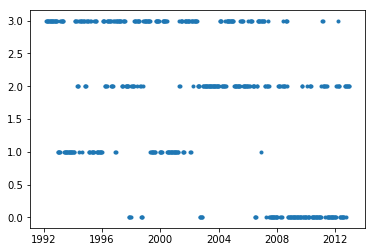

In [66]:
plt.scatter(NormRetDF.index[np.arange(Period+1, len(NormRetDF.index)-Shift, Shift)],
            ClusterPred, marker=".")
plt.show()

# That does not look like the original publication...
# BECAUSE THE GICS CLASSIFICATION HAS CHANGED!!

##### Reduce number of matrix elements

Diagonal is always 1 and rest is symmetric
-> only need one triangle of the correlation matrices

In [41]:
IntCorrMat = IntervalCorr.to_numpy()
print(IntCorrMat.shape)

(11, 11)


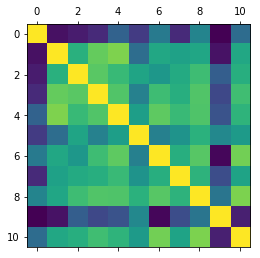

In [42]:
plt.matshow(IntCorrMat)
plt.show()

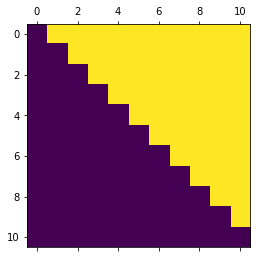

In [43]:
plt.matshow(np.triu(IntCorrMat,1)>0)
plt.show()

In [44]:
print(len((np.triu(IntCorrMat,1)).reshape(1,-1)[(np.triu(IntCorrMat,1)!=0).reshape(1,-1)]))

55


In [45]:
def ReduceData(CorrMat):
    # takes a nxn correlatin matrix and returns only upper triangle without diagonal elements as 1d array
    return((np.triu(CorrMat,1)).reshape(1,-1)[(np.triu(CorrMat,1)!=0).reshape(1,-1)])

print(ReduceData(IntCorrMat), len(ReduceData(IntCorrMat)))

[0.29443509 0.31598189 0.34930619 0.49164152 0.38714805 0.56351322
 0.34841181 0.59320714 0.25980431 0.5219849  0.73069372 0.82462637
 0.85793295 0.52374699 0.70283698 0.68257633 0.69679089 0.29640237
 0.70289355 0.81020371 0.75797156 0.69249885 0.65291834 0.7109304
 0.76898496 0.48076791 0.72381878 0.80029443 0.58468971 0.77132681
 0.72357977 0.79781658 0.42085005 0.77179472 0.67442255 0.81663808
 0.76167049 0.79677457 0.44805671 0.74105083 0.5834278  0.63869477
 0.73166645 0.60402368 0.66190279 0.72511789 0.80852412 0.27253144
 0.84368697 0.73947636 0.43598756 0.68886009 0.54671925 0.85280403
 0.32586505] 55


In [46]:
# now overlapping intervals
Period = 40 # 2 trading months
Shift = 10
T = int((len(NormRetDF) - Period)/Shift)

CorrMatrices = np.empty((T, 55))


for t in range(T):
    #print((0+t*Shift),(Period+t*Shift))
    IntervalDF = NormRetDF.iloc[(0+t*Shift):(Period+t*Shift)]
    IntervalCorr = IntervalDF.corr()
    CorrMatrices[t,:] = ReduceData(IntervalCorr.to_numpy())
    
    pca = PCA()
    pca.fit(IntervalCorr)
    print(pca.explained_variance_ratio_[0], t)

0.32411371916874165 0
0.38218707269295377 1
0.4195744463786481 2
0.5819414589257661 3
0.6089631438430719 4
0.7100231534604102 5
0.7005085905340306 6
0.6488720124082827 7
0.6290094788949169 8
0.650334038422894 9
0.6419190582905797 10
0.7013152534013669 11
0.6313243201915377 12
0.4726976276557616 13
0.55743562614853 14
0.48576294834325695 15
0.45834903117997133 16
0.5270480709749674 17
0.5596478190325295 18
0.557662110386036 19
0.562275234773346 20
0.460754816360477 21
0.4004646787839671 22
0.4015612918072087 23
0.4754613777465036 24
0.4673303727081798 25
0.4750748736648096 26
0.5243731831560214 27
0.5772389878168823 28
0.5397424029804049 29
0.4589801167323746 30
0.47431617848351804 31
0.42343834256342083 32
0.4979224691874256 33
0.513901520020294 34
0.43466997765584575 35
0.41788979376405294 36
0.3385539266316613 37
0.3201312449904968 38
0.31547732771109627 39
0.3654798771434805 40
0.4354701332611456 41
0.3640697304323174 42
0.37344478458591246 43
0.3379320358614164 44
0.303631711240209

0.36136345312596213 457
0.32757704000101356 458
0.3414486184008909 459
0.38594558561060033 460
0.5472449076056533 461
0.6511686666791213 462
0.568907905870025 463
0.5969709517978683 464
0.6749215214820268 465
0.6551997645888318 466
0.6686748466665863 467
0.6565452023127384 468
0.5323492092720904 469
0.4692666509841721 470
0.33698221397557276 471
0.32032201057965515 472
0.39774018958405455 473
0.43229813745439194 474
0.4202830409503115 475
0.37525468486446295 476
0.42260929583758144 477
0.42716635531700553 478
0.43519059145007577 479
0.561917207575853 480
0.5768233455704762 481
0.6097285206405922 482
0.4251522390691166 483
0.36386887453043276 484
0.4479936661373153 485
0.4064945108855394 486
0.49957799614819715 487
0.5975637712651095 488
0.578590492827609 489
0.49135981109645577 490
0.35277545208906624 491
0.38901083579221074 492
0.45847483072614587 493
0.6783398753477154 494
0.6910852513031701 495
0.656241528409921 496
0.605481443984567 497
0.6032940134399816 498
0.4652330948671123 499

In [47]:
CorrMatrices.shape

(525, 55)

525


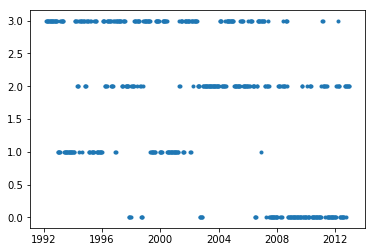

In [48]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(CorrMatrices)
ClusterPred = kmeans.fit_predict(CorrMatrices)
print(len(ClusterPred))
plt.scatter(NormRetDF.index[np.arange(Period+1, len(NormRetDF.index)-Shift, Shift)],
            ClusterPred, marker=".")
plt.show()


#### With DBSCAN instead of K-means

In [49]:
# determine mean distance as a guide for parameter epc in DBSCAN
from scipy.spatial import distance_matrix

distances = distance_matrix(CorrMatrices,CorrMatrices)
print(distances.shape)
print(np.mean(distances), np.std(distances))

(525, 525)
2.047576074582372 0.8155106036066697


In [50]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = np.mean(distances)-1*np.std(distances),
            min_samples=20)

In [51]:
db.fit(CorrMatrices)

DBSCAN(eps=1.2320654709757024, min_samples=20)

In [52]:
# Noisy samples are given the label -1
db.fit_predict(CorrMatrices)

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [67]:
CompaniesDF.iloc[15:]
CompaniesDF.to_csv("Companies1992_2012.csv")

In [70]:
ComDF = pd.read_csv("Companies1992_2012.csv", index_col = "Date")
print(ComDF.iloc[15:])

                 AES       LNT       AEP       ATO       CNP       CMS  \
Date                                                                     
1992-01-23  1.222135  0.856979 -0.788233  0.542558  0.144135 -0.436862   
1992-01-24 -0.851919  1.808037  0.780710 -1.251607  0.423839  0.685835   
1992-01-27 -2.934459  0.177430  0.736323 -0.006089  1.403012  1.082350   
1992-01-28  1.761504  0.424003  1.430255 -1.015174 -0.357585 -0.506345   
1992-01-29 -1.681220 -0.651191 -0.942252  0.066599  0.534006 -0.488287   
...              ...       ...       ...       ...       ...       ...   
2012-12-24 -1.081177 -0.270954 -0.869922 -0.922632 -0.418172 -0.206734   
2012-12-26 -0.253817 -1.051988 -1.304070 -2.098019 -2.123994 -0.721928   
2012-12-27 -1.229936 -0.084106 -0.345997 -0.392188 -0.213158 -0.484121   
2012-12-28 -1.076033 -0.657521 -1.157553 -0.781905  0.077233 -0.797519   
2012-12-31  1.980571  0.998821  1.635557  1.632783  2.884628  1.891091   

                  ED         D       

## Alternativ: Erst aggregieren, dann normieren